In [1]:
#scrape indeed  https://pl.indeed.com/praca?q=Analityk&l=Gda%C5%84sk&radius=50&fromage=30 
from pymongo import MongoClient
import requests
import datetime
from bs4 import BeautifulSoup

In [2]:
from PIL import Image
from io import BytesIO
import base64

In [3]:
import time
import pandas as pd
from IPython.display import HTML
import re
#for i in range(10,15):
#    time.sleep(2)
#    print(i)

In [4]:
def image_formatter(image):
    img = base64.b64encode(image).decode()
    return f'<img src="data:image/png;base64,{img}" width="1200" height="1200">'

In [5]:
client = MongoClient()
database = client["db_rowery"]
collection_rowery = database["collection_rowery"]
#test_rowery_centrum = database['test_rowery_centrum']

## Scraping www.dadelo.pl

In [6]:
#https://www.dadelo.pl/rowery-gorskie-mtb/meskie_czarny/?attr[345]=37058
#meskie
#czarne
#27,5 cal koła

In [7]:
r=requests.get('https://www.dadelo.pl/rowery-gorskie-mtb/meskie_czarny/?attr[345]=37058')
site = BeautifulSoup(r.text,'html.parser')
i=0
for rower in site.find_all('div',attrs={'class':'name'}):
    i = i+1
    rower_site = 'https://www.dadelo.pl'+rower.a['href']
    rower_site_content = requests.get(rower_site)
    rower_soup = BeautifulSoup(rower_site_content.text,'html.parser')
    #przypisanie nazwy
    name = rower_soup.find('h1', attrs = {'class':'bold'}).text
    #przypisanie ceny
    price_text = rower_soup.find('strong',attrs = {'class':'main-price bold'}).text
    price = int(price_text.split(',')[0])
    #przypisanie zdjecia w bytach
    photo_link = 'https://www.dadelo.pl'+rower_soup.find('div',attrs = {'class':'photo'}).a['href']
    photo = requests.get(photo_link).content
    #przypisanie wielkosci ramy
    specyfikacje = rower_soup.find('div', attrs = {'class':'content'})
    for label in specyfikacje.find_all('span'):
        if 'Rozmiar ramy' in label.text:
            rama = label.find_next_sibling().text
            break
    rama = re.sub('[^0-9," ]+', '', rama).replace('"'," ").strip()
    rama = '/'.join(rama.split())
    date = datetime.datetime.today().replace(microsecond=0)
    #dzien = date.strftime("%d")
    #miesiac = date.strftime("%m")
    #rok = date.strftime("%Y")
    rower_doc = {'data':date,
                #'rok':rok,
                #'miesiac': miesiac,
                #'dzien': dzien,
                'model':name,
                'cena':price,
                'rama_w_cal':rama,
                'zdjecie':photo,
                'zdjecie_link':photo_link,
                'sklep':'Dadelo',
                'strona_www':rower_site,
                'sort':i}
    collection_rowery.insert_one(rower_doc)
    time.sleep(2)
    print(name+' has been added on '+str(date)+' '+str(i))
collection_rowery.create_index([('data',-1),('sort',1),('sklep',1)])

Rower MTB DEMA Pegas 1.0 has been added on 2022-01-15 05:19:01 1
Rower MTB KELLYS Spider 30  27,5" has been added on 2022-01-15 05:19:04 2
Rower MTB KELLYS Spider 50  27.5" has been added on 2022-01-15 05:19:09 3
Rower MTB KELLYS Spider 70  27.5" has been added on 2022-01-15 05:19:12 4
Rower MTB SUPERIOR TEAM 27 ELITE has been added on 2022-01-15 05:19:16 5
Rower MTB SUPERIOR TEAM 27 ISSUE has been added on 2022-01-15 05:19:19 6


'data_-1_sort_1_sklep_1'

## Scraping www.centrumrowerowe.pl/

In [8]:
#https://www.centrumrowerowe.pl/rowery/gorskie-mtb/27-5-cala/?attr[340]=37237&attr[342]=37050
#czarne
#27,5 cal koła
#męskie

In [9]:
r=requests.get('https://www.centrumrowerowe.pl/rowery/gorskie-mtb/27-5-cala/?attr[340]=37237&attr[342]=37050')
site = BeautifulSoup(r.text,'html.parser')
i=0
for rower in site.find_all('div',attrs={'class':'name'}):
    if rower.a == None:
        continue
    i = i+1
    rower_site = 'https://www.centrumrowerowe.pl'+rower.a['href']
    rower_site_content = requests.get(rower_site)
    rower_soup = BeautifulSoup(rower_site_content.text,'html.parser')
    #przypisanie nazwy
    name = rower_soup.find('h1', attrs = {'class':'bold'}).text
    #przypisanie ceny
    html_price = rower_soup.find('div',attrs = {'class':'main-price'})
    price = int(html_price.find('span',attrs = {'class':'int-part'}).text.replace(" ", ""))
    #przypisanie zdjecia w bytach
    photo_link = 'https://www.centrumrowerowe.pl/'+rower_soup.find('div', {'class':'photo'}).a['href']
    photo = requests.get(photo_link).content
    #przypisanie wielkosci ramy
    specyfikacje = rower_soup.find('div', attrs = {'class':'content'})
    specyfikacje = rower_soup.find('ul', attrs = {'class':'parameter-list'})
    for label in specyfikacje.find_all('span'):
        if 'Rozmiar ramy' in label.text:
            rama = label.find_next_sibling().text
            break
    rama = re.sub('[^0-9," ]+', '', rama).replace('"'," ").strip()
    rama = '/'.join(rama.split())
    date = datetime.datetime.today().replace(microsecond=0)
    #dzien = date.strftime("%d")
    #miesiac = date.strftime("%m")
    #rok = date.strftime("%Y")
    rower_doc = {'data':date,
                #'rok':rok,
                #'miesiac': miesiac,
                #'dzien': dzien,
                'model':name,
                'cena':price,
                'rama_w_cal':rama,
                'zdjecie':photo,
                'zdjecie_link':photo_link,
                'sklep':'Centrum Rowerowe',
                'strona_www':rower_site,
                'sort':i}
    collection_rowery.insert_one(rower_doc)
    time.sleep(2)
    print(name+' has been added on '+str(date)+' '+str(i))
print("Done")
#test_rowery_centrum.create_index([('data',-1),('sort',1)])

Rower MTB DEMA Pegas 1.0 has been added on 2022-01-15 05:19:31 1
Rower MTB KELLYS Spider 30  27,5" has been added on 2022-01-15 05:19:35 2
Rower MTB KELLYS Spider 50  27.5" has been added on 2022-01-15 05:19:39 3
Rower MTB KELLYS Spider 70  27.5" has been added on 2022-01-15 05:19:43 4
Rower MTB SUPERIOR TEAM 27 ELITE has been added on 2022-01-15 05:19:47 5
Rower MTB SUPERIOR TEAM 27 ISSUE has been added on 2022-01-15 05:19:51 6


## Queries

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

,data,model,cena,rama_w_cal,zdjecie,sklep,strona_www
0,2022-01-15 05:19:04,"Rower MTB KELLYS Spider 30 27,5""",2149,16,,Dadelo,https://www.dadelo.pl/rower-mtb-kellys-spider-30-27-5-pd23300/?v_Id=145258

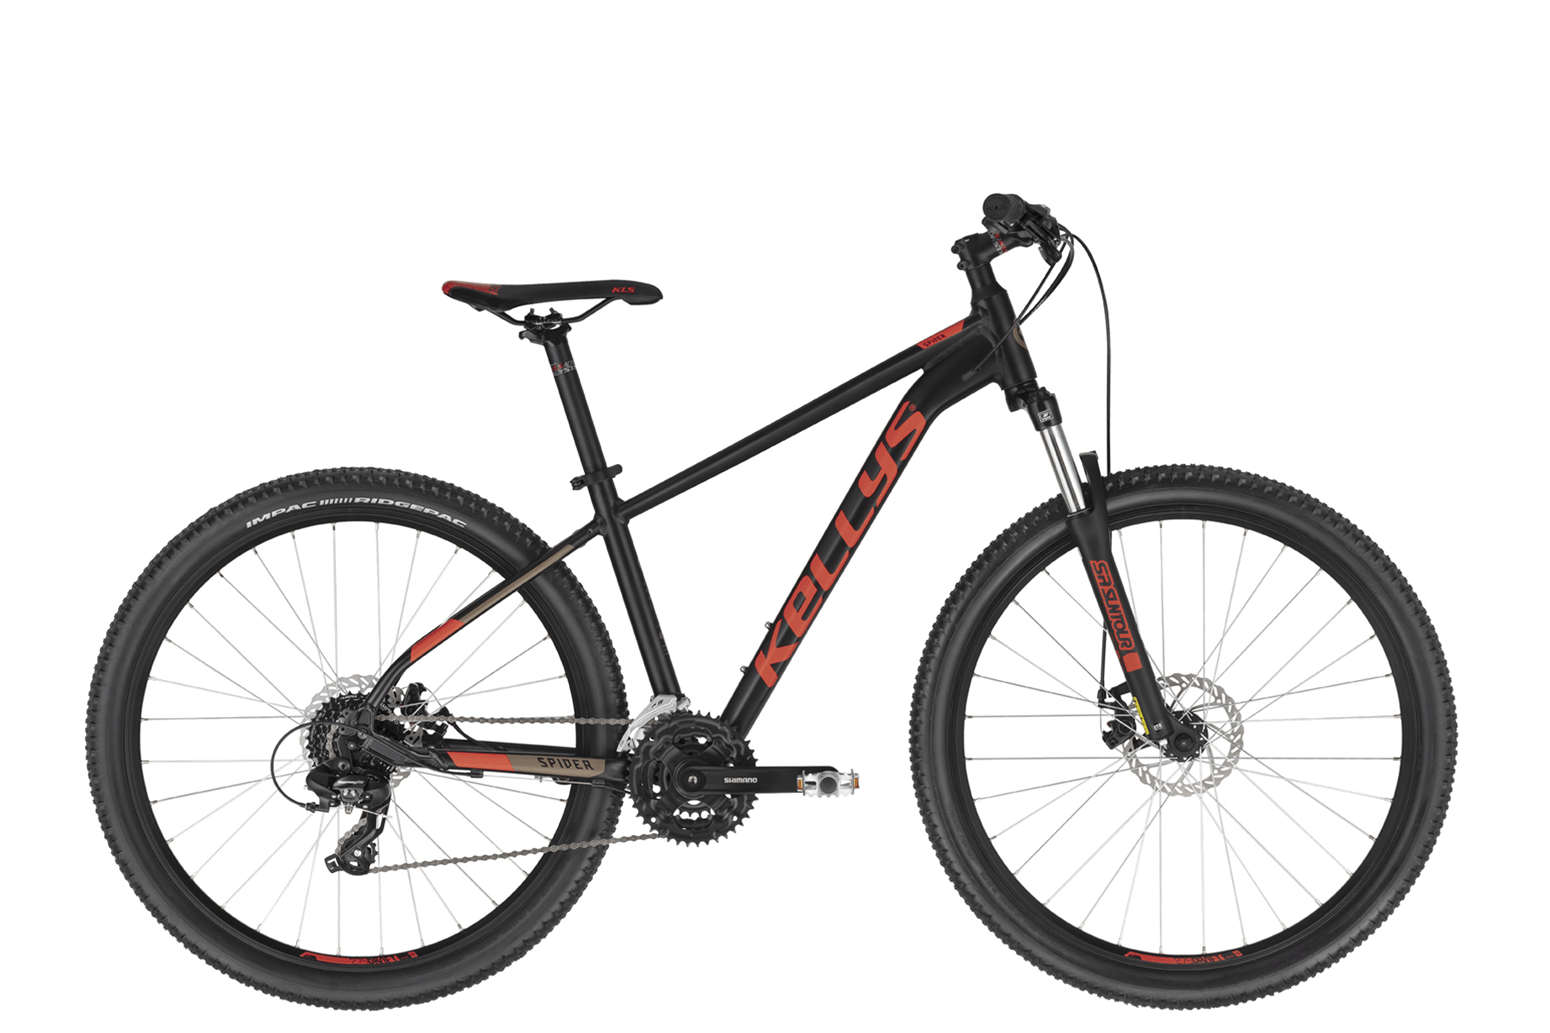

In [11]:
#rgx = re.compile('/.*Spider.*/', re.IGNORECASE)
#cursor = test_rowery_dadelo.find({'data':'2021/12/26'})
cursor = database.collection_rowery.find_one({'model':{'$regex':'Spider'}})
df_one = pd.DataFrame.from_dict(cursor, orient='index').T
HTML(df_one[['data','model','cena','rama_w_cal','zdjecie','sklep','strona_www']].to_html(formatters = {'zdjecie':image_formatter},render_links = True,escape = False))

,data,model,cena,rama_w_cal,zdjecie,sklep,strona_www
0,2022-01-15 05:19:01,Rower MTB DEMA Pegas 1.0,1899,15,,Dadelo,https://www.dadelo.pl/rower-mtb-dema-pegas-1-0-pd25928/?v_Id=156262
1,2022-01-15 05:19:31,Rower MTB DEMA Pegas 1.0,1899,15/17,,Centrum Rowerowe,https://www.centrumrowerowe.pl/rower-mtb-dema-pegas-1-0-pd25928/

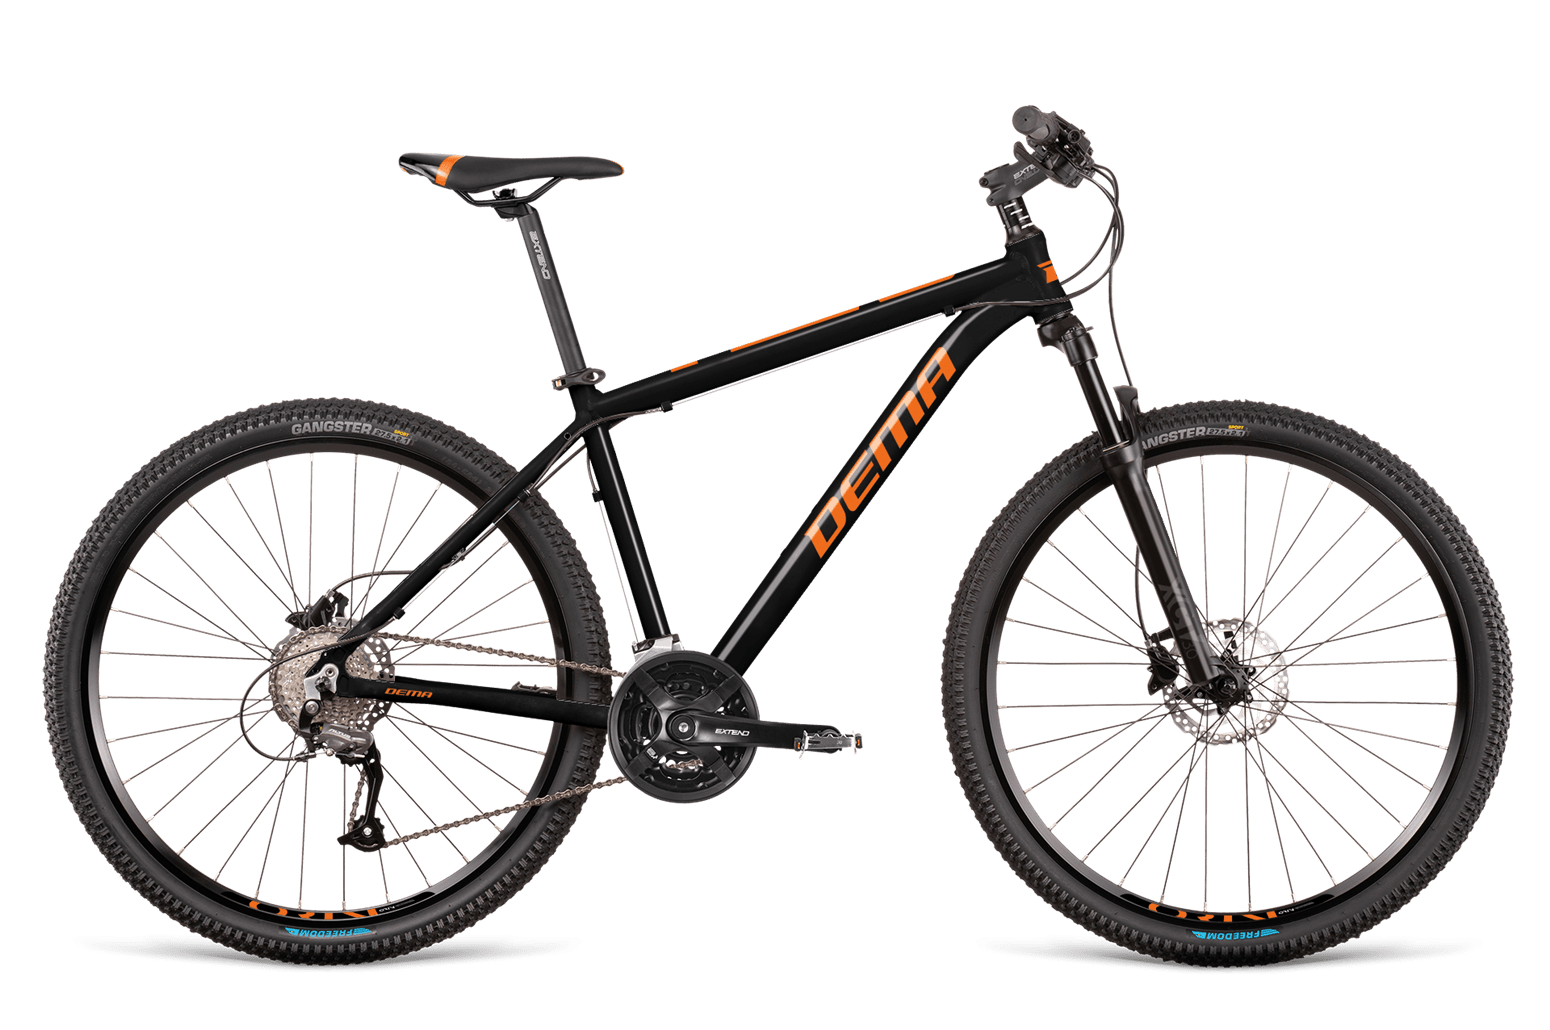
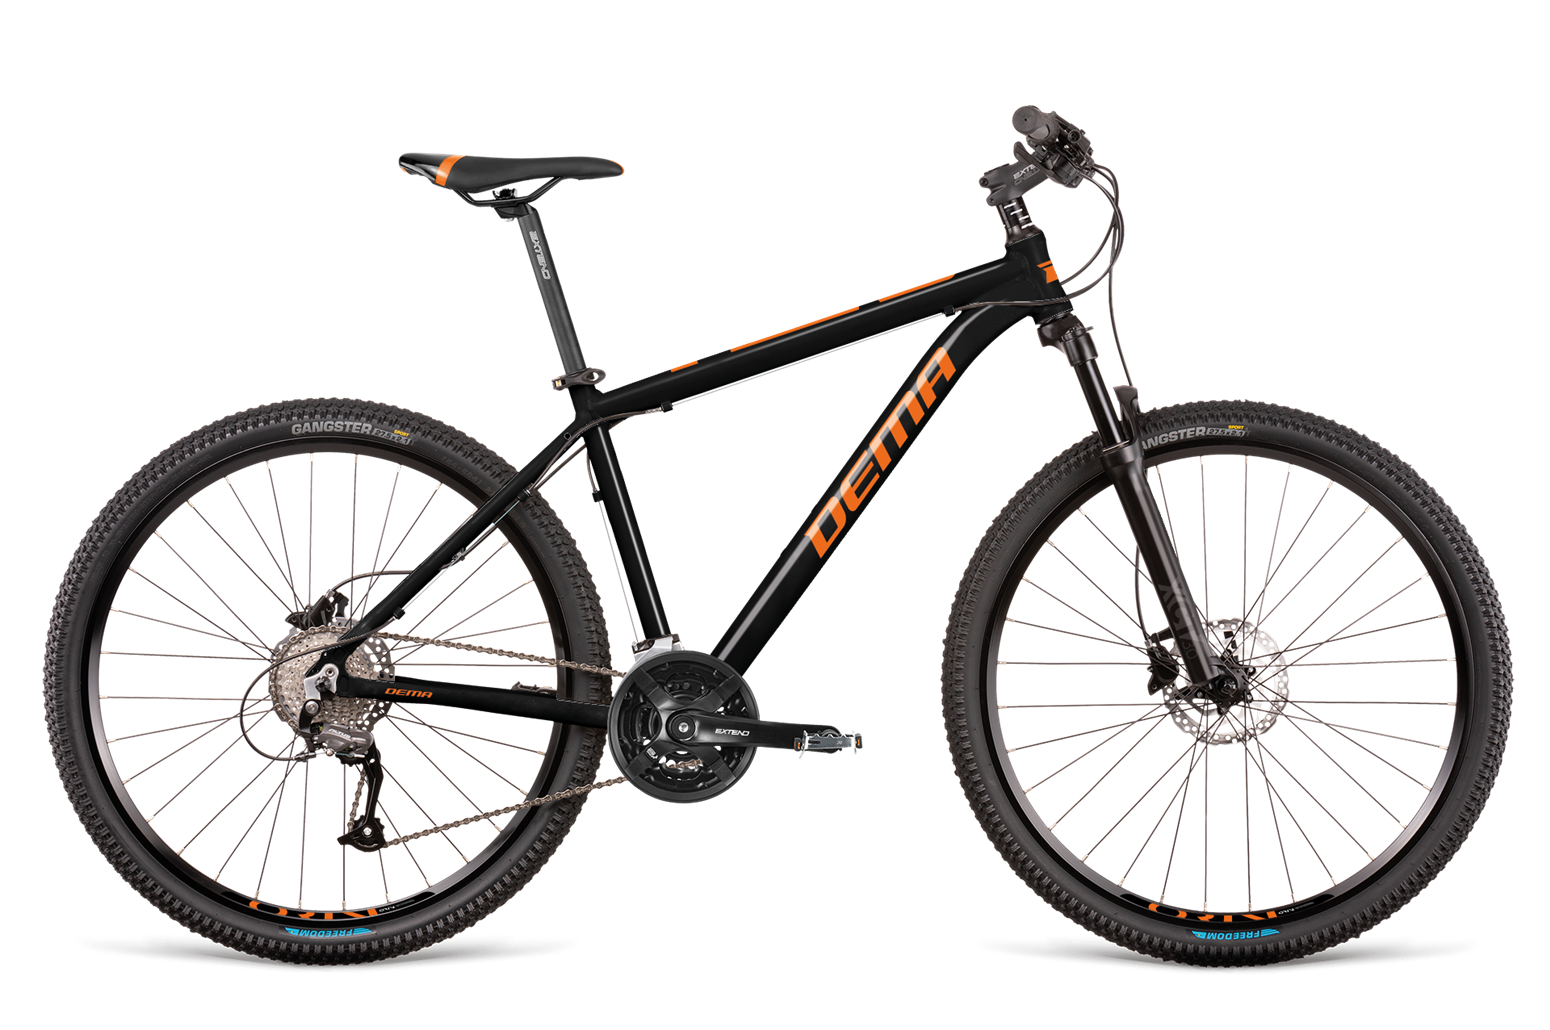

In [15]:
cursor3 = database.collection_rowery.find({'model':{'$regex':'Pegas'}})
df_multiple = pd.DataFrame(list(cursor3))
HTML(df_multiple[['data','model','cena','rama_w_cal','zdjecie','sklep','strona_www']].to_html(formatters = {'zdjecie':image_formatter},render_links = True,escape = False))

In [13]:
start_date = datetime.datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)

In [16]:
cursor1 = database.collection_rowery.find({'model':{'$regex':'Spider'}, 'data': {'$gte': start_date} })
df = pd.DataFrame(list(cursor1))
df[['data','model','cena','rama_w_cal','sklep','strona_www']]

,data,model,cena,rama_w_cal,sklep,strona_www
0,2022-01-15 05:19:43,"Rower MTB KELLYS Spider 70 27.5""",2799,16/18,Centrum Rowerowe,https://www.centrumrowerowe.pl/rower-mtb-kellys-spider-70-27-5-pd23304/
1,2022-01-15 05:19:39,"Rower MTB KELLYS Spider 50 27.5""",2499,16/18,Centrum Rowerowe,https://www.centrumrowerowe.pl/rower-mtb-kellys-spider-50-27-5-pd23302/?v_Id=145268
2,2022-01-15 05:19:35,"Rower MTB KELLYS Spider 30 27,5""",2149,16/18,Centrum Rowerowe,https://www.centrumrowerowe.pl/rower-mtb-kellys-spider-30-27-5-pd23300/
3,2022-01-15 05:19:12,"Rower MTB KELLYS Spider 70 27.5""",2799,18,Dadelo,https://www.dadelo.pl/rower-mtb-kellys-spider-70-27-5-pd23304/?v_Id=145278
4,2022-01-15 05:19:09,"Rower MTB KELLYS Spider 50 27.5""",2499,16,Dadelo,https://www.dadelo.pl/rower-mtb-kellys-spider-50-27-5-pd23302/?v_Id=145268
5,2022-01-15 05:19:04,"Rower MTB KELLYS Spider 30 27,5""",2149,16,Dadelo,https://www.dadelo.pl/rower-mtb-kellys-spider-30-27-5-pd23300/?v_Id=145258


In [17]:
cursor2 = database.collection_rowery.find({'cena':{'$lte':3500} })
df = pd.DataFrame(list(cursor2))
df[['data','model','cena','rama_w_cal','sklep','strona_www']]

,data,model,cena,rama_w_cal,sklep,strona_www
0,2022-01-15 05:19:01,Rower MTB DEMA Pegas 1.0,1899,15,Dadelo,https://www.dadelo.pl/rower-mtb-dema-pegas-1-0-pd25928/?v_Id=156262
1,2022-01-15 05:19:04,"Rower MTB KELLYS Spider 30 27,5""",2149,16,Dadelo,https://www.dadelo.pl/rower-mtb-kellys-spider-30-27-5-pd23300/?v_Id=145258
2,2022-01-15 05:19:09,"Rower MTB KELLYS Spider 50 27.5""",2499,16,Dadelo,https://www.dadelo.pl/rower-mtb-kellys-spider-50-27-5-pd23302/?v_Id=145268
3,2022-01-15 05:19:12,"Rower MTB KELLYS Spider 70 27.5""",2799,18,Dadelo,https://www.dadelo.pl/rower-mtb-kellys-spider-70-27-5-pd23304/?v_Id=145278
4,2022-01-15 05:19:31,Rower MTB DEMA Pegas 1.0,1899,15/17,Centrum Rowerowe,https://www.centrumrowerowe.pl/rower-mtb-dema-pegas-1-0-pd25928/
5,2022-01-15 05:19:35,"Rower MTB KELLYS Spider 30 27,5""",2149,16/18,Centrum Rowerowe,https://www.centrumrowerowe.pl/rower-mtb-kellys-spider-30-27-5-pd23300/
6,2022-01-15 05:19:39,"Rower MTB KELLYS Spider 50 27.5""",2499,16/18,Centrum Rowerowe,https://www.centrumrowerowe.pl/rower-mtb-kellys-spider-50-27-5-pd23302/?v_Id=145268
7,2022-01-15 05:19:43,"Rower MTB KELLYS Spider 70 27.5""",2799,16/18,Centrum Rowerowe,https://www.centrumrowerowe.pl/rower-mtb-kellys-spider-70-27-5-pd23304/
